### 선형 회귀 (Linear Regression)
---

선형 회귀란 독립 변수 x의 변화에 따라 변화하는 종속 변수 y의 선형 관계를 모델링하는 것입니다.

독립 변수 x의 개수가 1개면 단순 선형 회귀 (Simple Linear Regression), 여러개가 되면 다중 선형 회귀 (Multiple Linear Regression)이 됩니다.

> #### 1차 방정식 (Linear Equation)


단순 선형 회귀는 1차 방적식으로 나타낼 수 있습니다.

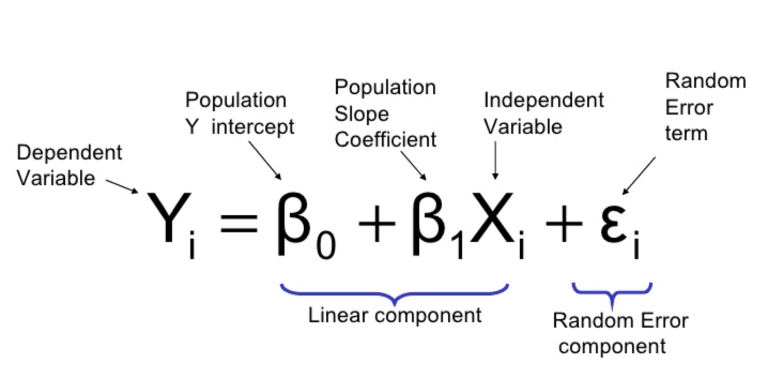

* $Y_i$ : 종속변수 y
* $B_0$ : 절편 (Intercept)
* $B_1$ : 기울기 (Coefficient)
* $X_i$ : 독립변수 x
* $\epsilon_i$ : 편항 (bias)

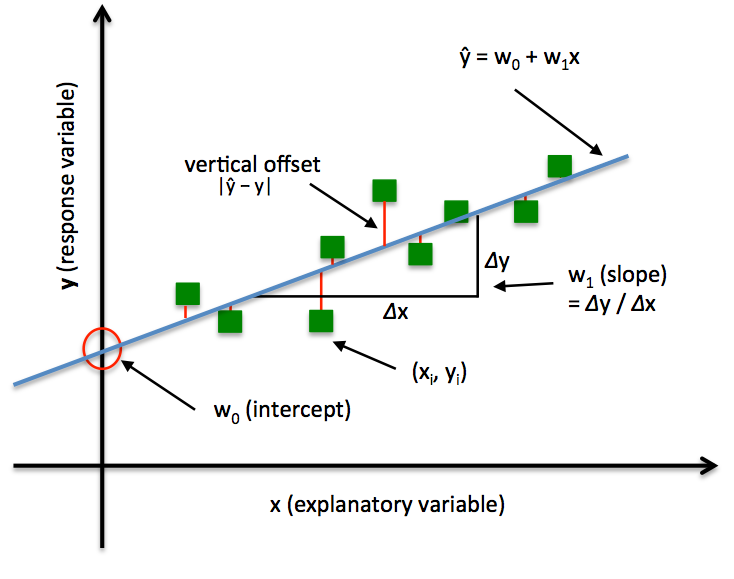

모든 데이터를 가장 잘 표현하는 선을 최적의 선 (Line of best fit, Best fit line)이라 합니다.

> #### 최소제곱법 (Ordinary Least Squares, OLS)


최적의 선을 표현하기 위해 기울기(Coefficient)와 절편(Intercept)를 구해야 합니다. 이는 OLS식을 활용하여 쉽게 구할 수 있습니다.

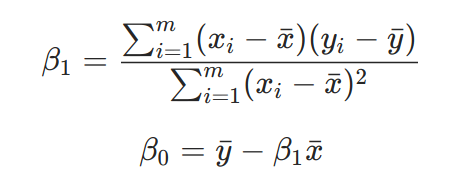

* $m$ : 데이터의 개수
* $\bar x$ : x의 평균
* $\bar y$ : y의 평균

다음과 같은 데이터가 있다고 합시다.

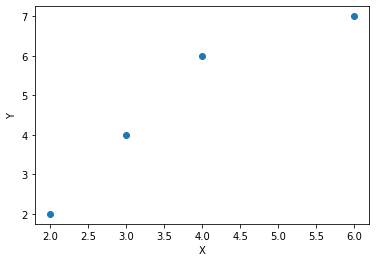

In [91]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.array([2, 3, 4, 6]).reshape(-1, 1)
y = np.array([2, 4, 6, 7]).reshape(-1, 1)

plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x, y)
plt.show()

OLS for Coefficient

In [34]:
m = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean())**2)
print(f"Coef : {m}")

Coef : 1.2285714285714286


OLS for Intercept

In [35]:
b = y.mean() - m * x.mean()
print(f"Intercept : {b}")

Intercept : 0.14285714285714235


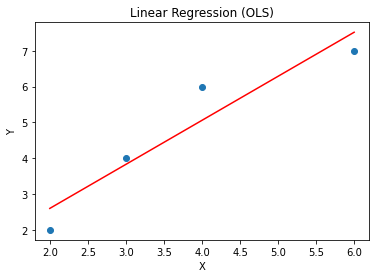

In [38]:
plt.title("Linear Regression (OLS)")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x, y)
plt.plot(x, x * m + b, c = 'r')
plt.show()

> #### Simple Linear Regression Model 

scikit-learn 머신 러닝 모델을 활용하여 최적의 선의 기울기와 절편을 구해봅니다.

In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
coef = lr.coef_
print(coef)

[[1.22857143]]


In [56]:
intercept = lr.intercept_
print(intercept)

[0.14285714]


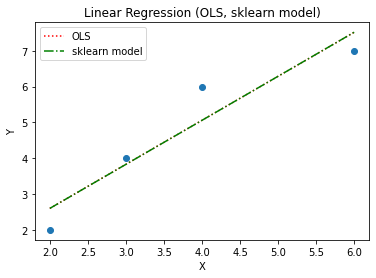

In [57]:
plt.title("Linear Regression (OLS, sklearn model)")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x, y)
plt.plot(x, x * m + b, c = 'r', linestyle = ':', label = "OLS")
plt.plot(x, x * coef + intercept, linestyle = '-.', c = 'g', label = "sklearn model")
plt.legend()
plt.show()

OLS를 활용하여 계산된 값과 동일한 값을 나타냅니다.

> #### 결정계수 (R2 Score)

선형 회귀 모델의 적합도(fitness)를 측정하기 위한 지표입니다.

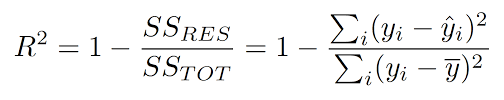

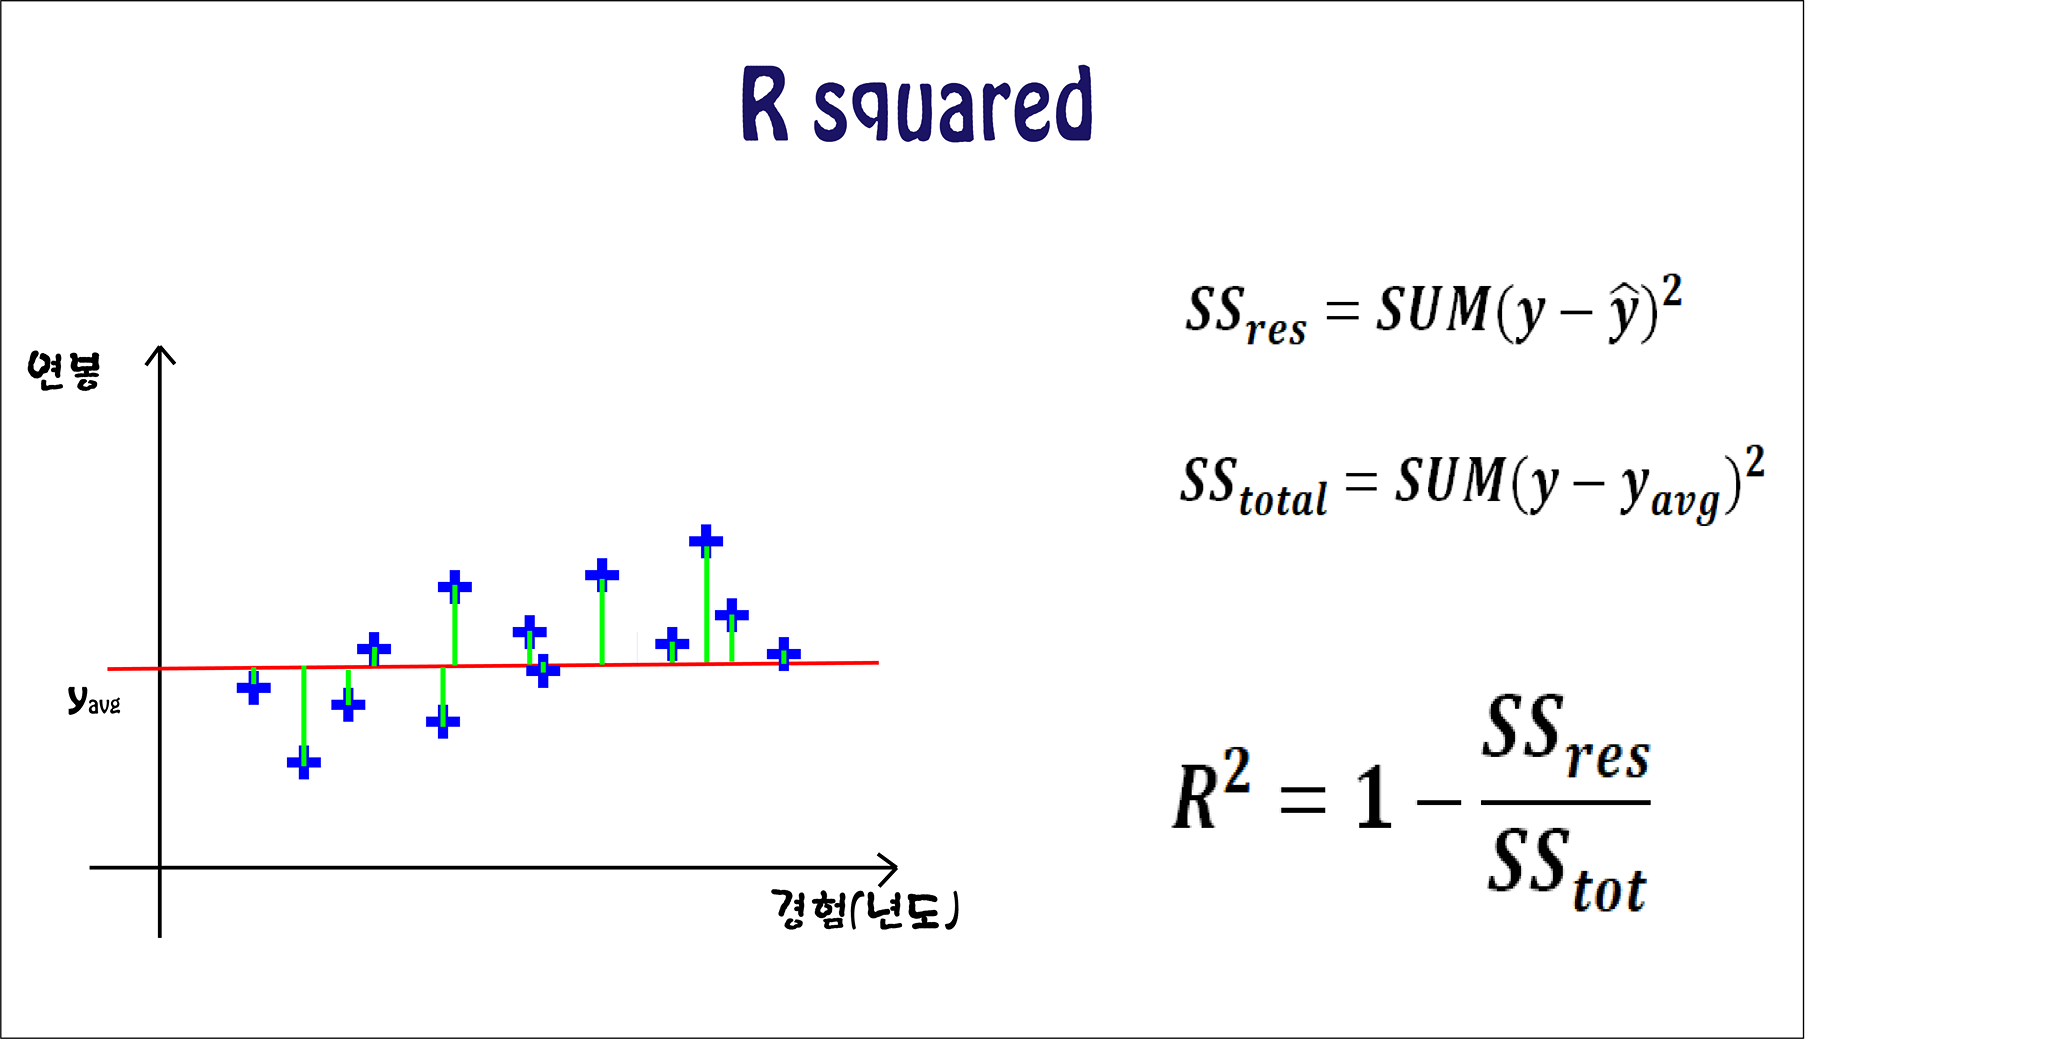

* $SS_{res}$ : Squared Sum of Residuals, 실제 값과 예측 값의 차이의 제곱의 합
* $SS_{tot}$ : Squared Sum of Total, 실제 값과 평균 결과 값의 차이의 제곱의 합 

In [58]:
ssres = ((y - (x * coef + intercept)) ** 2).sum()
print("SSres:", ssres)

SSres: 1.5428571428571427


In [59]:
sstot = ((y - (y.mean())) ** 2).sum()
print("SStot:", sstot)

SStot: 14.75


In [60]:
r2 = 1 - (ssres / sstot)
print("R2 score:", r2)

R2 score: 0.8953995157384989


선형 회귀 모델을 활용한 결정계수

In [67]:
lr.score(x, y)

0.8953995157384989

> #### 평균 제곱 오차 (Mean Squared Error)

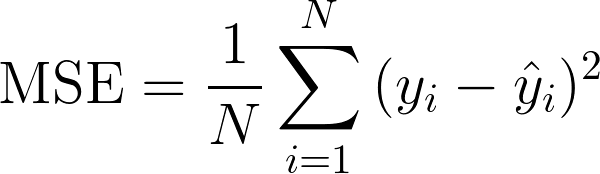

단순히 실제 값과 예측 값의 제곱의 합, 즉 $SS_{res}$를 데이터의 개수만큼으로 나눠 평균을 낸 것입니다.

최적의 선이 평균적으로 얼마만큼의 에러를 보이는지 측정하는 지표이며, 머신 러닝(딥 러닝)에서는 손실 지표/함수 (Cost/Loss function)으로 활용됩니다.

In [95]:
pred = lr.predict(x)
print(pred)

[[2.6       ]
 [3.82857143]
 [5.05714286]
 [7.51428571]]


In [97]:
error = np.sum((y - pred)**2) / len(x)
print(error)

0.3857142857142857


선형 회귀 모델을 활용한 MSE

In [93]:
from sklearn.metrics import mean_squared_error as mse 

pred = lr.predict(x)
print(mse(y, pred))

0.3857142857142857


### Example

#### Dataset

In [68]:
import pandas as pd

salary_data_from_github = "https://raw.githubusercontent.com/dukalee/machine-learning/main/01-Linear%20Regression/Salary_Data.csv"
data = pd.read_csv(salary_data_from_github)
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Visualization

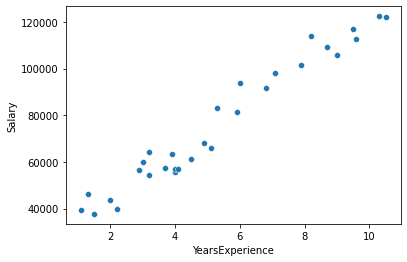

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = data, x = "YearsExperience", y = "Salary")
plt.show()

#### Data Preprocessing

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [71]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [72]:
X = data["YearsExperience"]
y = data["Salary"]

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [74]:
X_train.shape, X_test.shape

((21,), (9,))

In [75]:
import numpy as np

X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

#### Simple Linear Regression Model

In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Visualization2

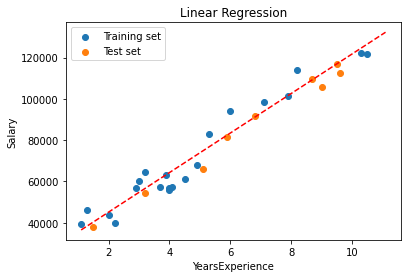

In [90]:
plt.title("Linear Regression")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.scatter(X_train, y_train, label = "Training set")
plt.scatter(X_test, y_test, label = "Test set")
plt.plot(np.arange(min(X), max(X) + 1, 5), 
         model.predict(np.arange(min(X), max(X) + 1, 5).reshape(-1,1)), 
         c = 'r', linestyle = '--')
plt.legend()
plt.show()

#### Evaluation

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [18]:
y_pred = model.predict(X_test)

In [19]:
print(r2_score(y_test, y_pred))

0.9746363787521536


In [21]:
print(mse(y_test, y_pred))

17978409.49734413
